### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.

    Note:
    You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

# 6.2.6 Get the City Weather Data #

### Import Dependencies, and Initialize an Empty List and Counters ###

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=29364cbe7cc686003a1aabd7b3d8dbc4


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop Through the List of Cities and Build the City URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 1 | ostrovnoy
Processing Record 3 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | roma
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | kahului
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | meulaboh
Processing Record 12 of Set 1 | manaus
Processing Record 13 of Set 1 | maksatikha
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | freeport
Processing Record 16 of Set 1 | ambilobe
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | meyungs
City not found. Skipping...
Processing Record 19 of Set 1 | alugan
Processing Record 20 of Set 1 | karwar
Processing Record 21 of Set 1 | rikitea
Processi

Processing Record 37 of Set 4 | zarichne
Processing Record 38 of Set 4 | solikamsk
Processing Record 39 of Set 4 | tual
Processing Record 40 of Set 4 | kozhva
Processing Record 41 of Set 4 | kuche
City not found. Skipping...
Processing Record 42 of Set 4 | karaton
Processing Record 43 of Set 4 | samarai
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | viedma
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | hobyo
Processing Record 48 of Set 4 | bambanglipuro
Processing Record 49 of Set 4 | khonsa
Processing Record 50 of Set 4 | manadhoo
Processing Record 1 of Set 5 | belen
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | cefalu
Processing Record 4 of Set 5 | magadan
Processing Record 5 of Set 5 | bredasdorp
Processing Record 6 of Set 5 | jutai
Processing Record 7 of Set 5 | husavik
Processing Record 8 of Set 5 | westport
Processing Record 9 of Set 5 | pochutla
Processing Record 10 of Set 5 | nanortalik
Processing 

Processing Record 26 of Set 8 | makakilo city
Processing Record 27 of Set 8 | tiksi
Processing Record 28 of Set 8 | dangtu
Processing Record 29 of Set 8 | rio grande
Processing Record 30 of Set 8 | peniche
Processing Record 31 of Set 8 | krasnoselkup
Processing Record 32 of Set 8 | boa vista
Processing Record 33 of Set 8 | krasnouralsk
Processing Record 34 of Set 8 | aripuana
Processing Record 35 of Set 8 | galveston
Processing Record 36 of Set 8 | ankazoabo
Processing Record 37 of Set 8 | kieta
Processing Record 38 of Set 8 | lluta
Processing Record 39 of Set 8 | skibbereen
Processing Record 40 of Set 8 | mindif
Processing Record 41 of Set 8 | teya
Processing Record 42 of Set 8 | erzurum
Processing Record 43 of Set 8 | paro
Processing Record 44 of Set 8 | bacolod
Processing Record 45 of Set 8 | tura
Processing Record 46 of Set 8 | olafsvik
Processing Record 47 of Set 8 | wevelgem
Processing Record 48 of Set 8 | bagnolo mella
Processing Record 49 of Set 8 | paamiut
Processing Record 50

Processing Record 16 of Set 12 | usinsk
Processing Record 17 of Set 12 | miraflores
Processing Record 18 of Set 12 | sao benedito do rio preto
Processing Record 19 of Set 12 | show low
Processing Record 20 of Set 12 | navahrudak
Processing Record 21 of Set 12 | san carlos
Processing Record 22 of Set 12 | hovd
Processing Record 23 of Set 12 | nakusp
Processing Record 24 of Set 12 | juegang
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | gizo
Processing Record 27 of Set 12 | makat
Processing Record 28 of Set 12 | lorengau
Processing Record 29 of Set 12 | comodoro rivadavia
Processing Record 30 of Set 12 | vestmanna
Processing Record 31 of Set 12 | port-cartier
Processing Record 32 of Set 12 | nouadhibou
Processing Record 33 of Set 12 | chara
Processing Record 34 of Set 12 | yaizu
Processing Record 35 of Set 12 | danane
Processing Record 36 of Set 12 | kavaratti
Processing Record 37 of Set 12 | torres
Processing Record 38 of Set 12 | vincennes
Processing Record 39

### Handle API Request Errors with try-except Blocks

In [10]:
len(city_data)

596

# 6.2.7 Create a DataFrame of City Weather Data #

Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.0531,39.5131,34.36,97,100,18.03,RU,2021-10-29 13:19:06
1,Cidreira,-30.1811,-50.2056,70.81,75,100,15.99,BR,2021-10-29 13:19:07
2,Roma,43.2128,-75.4557,48.87,87,1,8.05,US,2021-10-29 13:19:07
3,Butaritari,3.0707,172.7902,82.87,71,1,15.43,KI,2021-10-29 13:19:08
4,Kahului,20.8947,-156.4700,75.85,88,1,6.91,US,2021-10-29 13:18:10
5,Tuktoyaktuk,69.4541,-133.0374,24.80,100,90,2.30,CA,2021-10-29 13:19:08
6,Albany,42.6001,-73.9662,44.80,86,1,1.99,US,2021-10-29 13:14:45
7,Bluff,-46.6000,168.3333,55.04,88,100,7.40,NZ,2021-10-29 13:19:09
8,Meulaboh,4.1363,96.1285,79.23,86,93,3.65,ID,2021-10-29 13:19:09
9,Manaus,-3.1019,-60.0250,82.90,83,40,2.30,BR,2021-10-29 13:15:49


In [12]:
# Reordet columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity",
                   "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,2021-10-29 13:19:06,68.0531,39.5131,34.36,97,100,18.03
1,Cidreira,BR,2021-10-29 13:19:07,-30.1811,-50.2056,70.81,75,100,15.99
2,Roma,US,2021-10-29 13:19:07,43.2128,-75.4557,48.87,87,1,8.05
3,Butaritari,KI,2021-10-29 13:19:08,3.0707,172.7902,82.87,71,1,15.43
4,Kahului,US,2021-10-29 13:18:10,20.8947,-156.4700,75.85,88,1,6.91
...,...,...,...,...,...,...,...,...,...
591,Klaksvik,FO,2021-10-29 13:23:20,62.2266,-6.5890,50.92,90,100,17.52
592,Baijiantan,CN,2021-10-29 13:23:20,45.6333,85.1833,56.05,39,15,5.66
593,Sioux Lookout,CA,2021-10-29 13:23:20,50.1001,-91.9170,41.07,87,90,6.91
594,Katherine,AU,2021-10-29 13:23:21,-14.4667,132.2667,79.12,73,99,2.30


Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file.

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Modify the .gitignore File ###

However, every time we want to add a new file or update current files to the repository, we have to add each file individually, which is time-consuming and cumbersome. Instead, we can add the files we don't want to track to the .gitignore file.

# 6.3.1. Plot Latitude vs. Temperature #

Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter().

### Get Data for Plotting


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

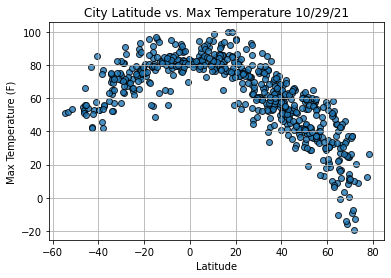

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

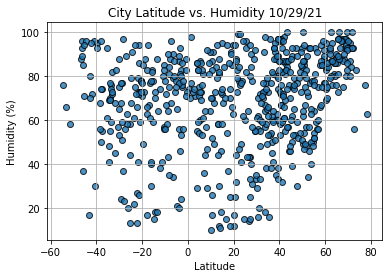

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

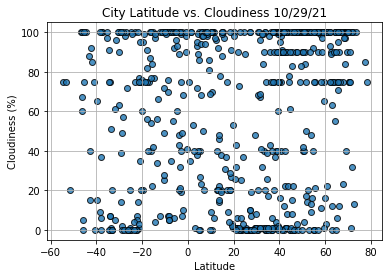

In [17]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

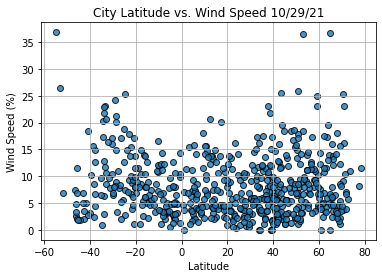

In [18]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()